In [1]:
import time
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from astropy import stats, visualization

from sbigclient.sbigcam import MATCam, F9WFSCam

%load_ext autoreload
%autoreload 2

In [2]:
c = MATCam()

SBIG CCD CONNECTION Connection SwitchVector OneOfMany
    CONNECT Connect Switch On
    DISCONNECT Disconnect Switch Off
SBIG CCD DRIVER_INFO Driver Info TextVector read only
    DRIVER_NAME Name Text SBIG CCD
    DRIVER_EXEC Exec Text indi_sbig_ccd
    DRIVER_VERSION Version Text 1.8
    DRIVER_INTERFACE Interface Text 18
SBIG CCD SIMULATION Simulation SwitchVector OneOfMany
    ENABLE Enable Switch Off
    DISABLE Disable Switch On
SBIG CCD CONFIG_PROCESS Configuration SwitchVector AtMostOne
    CONFIG_LOAD Load Switch Off
    CONFIG_SAVE Save Switch Off
    CONFIG_DEFAULT Default Switch Off
SBIG CCD ACTIVE_DEVICES Snoop devices TextVector read and write
    ACTIVE_TELESCOPE Telescope Text Telescope Simulator
    ACTIVE_FOCUSER Focuser Text Focuser Simulator
    ACTIVE_FILTER Filter Text CCD Simulator
    ACTIVE_SKYQUALITY Sky Quality Text SQM
SBIG CCD DEVICE_PORT_TYPE Port SwitchVector OneOfMany
    Ethernet Ethernet Switch Off
    USB 1 USB 1 Switch On
    USB 2 USB 2 Switch Off
  

In [3]:
c.process_events()

SBIG CCD FITS_HEADER FITS Header TextVector read and write
    FITS_OBSERVER Observer Text Mount Alignment Telescope
    FITS_OBJECT Object Text Clear
SBIG CCD CFW_TYPE Type SwitchVector AtMostOne
    CFW1 CFW-2 Switch Off
    CFW2 CFW-5 Switch Off
    CFW3 CFW-6A Switch Off
    CFW4 CFW-8 Switch Off
    CFW5 CFW-402 Switch On
    CFW6 CFW-10 Switch Off
    CFW7 CFW-10 SA Switch Off
    CFW8 CFW-L Switch Off
    CFW9 CFW-9 Switch Off
    CFW10 CFW-8LG Switch Off
    CFW11 CFW-1603 Switch Off
    CFW12 CFW-FW5-STX Switch Off
    CFW13 CFW-FW5-8300 Switch Off
    CFW14 CFW-FW8-8300 Switch Off
    CFW15 CFW-FW7-STX Switch Off
    CFW16 CFW-FW8-STT Switch Off


In [25]:
#  filter 1 -> R
#  filter 2 -> V
#  filter 3 -> B
#  filter 4 -> clear
c.filter = 4

In [64]:
f = c.expose(exptime=60, exptype="Light")

SBIG CCD CCD_FRAME_TYPE Frame Type SwitchVector OneOfMany
    FRAME_LIGHT Light Switch On
    FRAME_BIAS Bias Switch Off
    FRAME_DARK Dark Switch Off
    FRAME_FLAT Flat Switch Off
SBIG CCD CCD_EXPOSURE Expose NumberVector read and write
    CCD_EXPOSURE_VALUE Duration (s) Number 60
reading out...


<IPython.core.display.Javascript object>


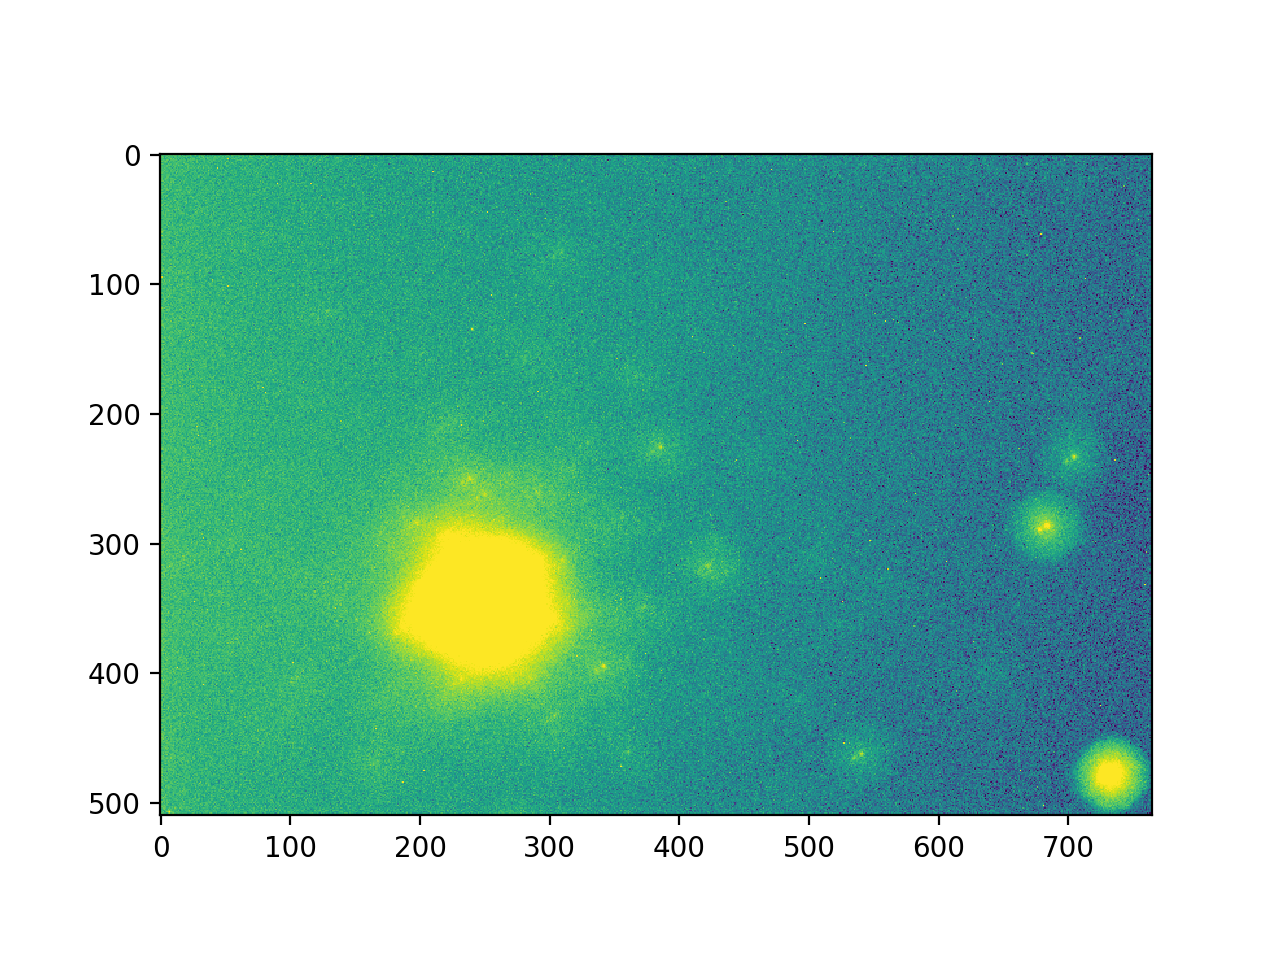

In [65]:
norm = visualization.ImageNormalize(
    f[0].data,
    interval=visualization.ZScaleInterval(),
    stretch=visualization.AsinhStretch()
)
plt.imshow(f[0].data, norm=norm)
plt.show()

In [66]:
f.writeto("globular.fits", clobber=True)

In [ ]:
f[0].header

In [ ]:
int(c.get_float("SBIG CCD", "FILTER_SLOT", "FILTER_SLOT_VALUE"))

In [95]:
c.temperature

-19.101291279870587

# F/9 WFS Camera dev

In [5]:
f9 = F9WFSCam()

SBIG CCD CONNECTION Connection SwitchVector OneOfMany
    CONNECT Connect Switch On
    DISCONNECT Disconnect Switch Off
SBIG CCD DRIVER_INFO Driver Info TextVector read only
    DRIVER_NAME Name Text SBIG CCD
    DRIVER_EXEC Exec Text indi_sbig_ccd
    DRIVER_VERSION Version Text 1.8
    DRIVER_INTERFACE Interface Text 22
SBIG CCD SIMULATION Simulation SwitchVector OneOfMany
    ENABLE Enable Switch Off
    DISABLE Disable Switch On
SBIG CCD CONFIG_PROCESS Configuration SwitchVector AtMostOne
    CONFIG_LOAD Load Switch Off
    CONFIG_SAVE Save Switch Off
    CONFIG_DEFAULT Default Switch Off
SBIG CCD ACTIVE_DEVICES Snoop devices TextVector read and write
    ACTIVE_TELESCOPE Telescope Text Telescope Simulator
    ACTIVE_FOCUSER Focuser Text Focuser Simulator
    ACTIVE_FILTER Filter Text CCD Simulator
    ACTIVE_SKYQUALITY Sky Quality Text SQM
SBIG CCD DEVICE_PORT_TYPE Port SwitchVector OneOfMany
    Ethernet Ethernet Switch Off
    USB 1 USB 1 Switch On
    USB 2 USB 2 Switch Off
  

In [28]:
f9.process_events()

In [ ]:
v = f9.get_vector("SBIG CCD", "CCD_BINNING")
e = v.elements[0]

In [ ]:
for e in v.elements:
    print("%s %s" % (e.getName(), e.get_int()))

In [67]:
f9.connected

True

In [79]:
f9.process_events()

In [74]:
f9.wfs_config()

In [ ]:
f9.default_config()

In [ ]:
f9.binning

In [91]:
f9.process_events()
f = f9.expose(exptime=1.0, exptype="Light")

SBIG CCD CCD_FRAME_TYPE Frame Type SwitchVector OneOfMany
    FRAME_LIGHT Light Switch On
    FRAME_BIAS Bias Switch Off
    FRAME_DARK Dark Switch Off
    FRAME_FLAT Flat Switch Off
SBIG CCD CCD_EXPOSURE Expose NumberVector read and write
    CCD_EXPOSURE_VALUE Duration (s) Number 1.0
reading out...


<IPython.core.display.Javascript object>


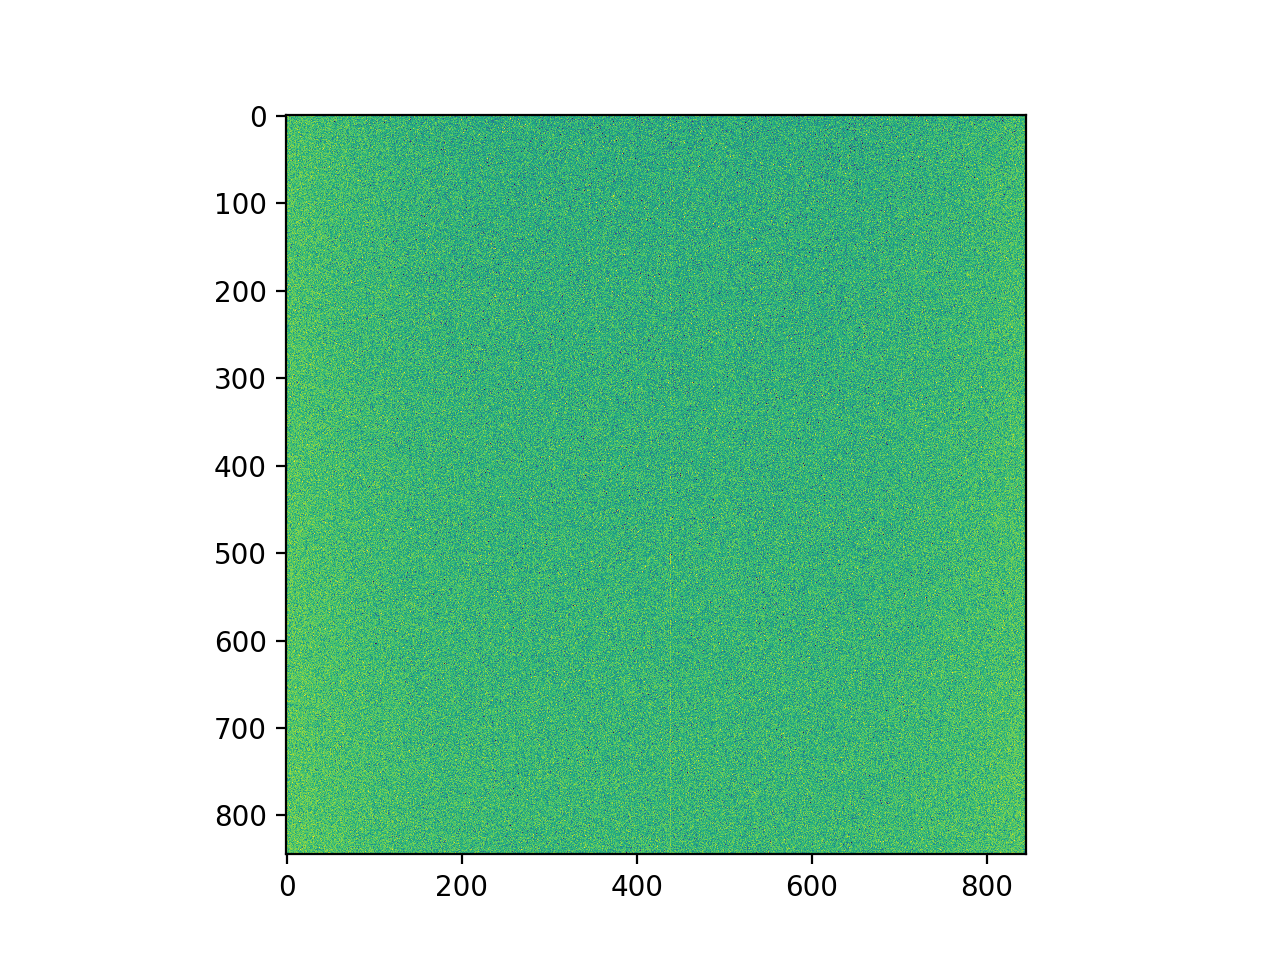

In [92]:
norm = visualization.ImageNormalize(
    f[0].data,
    interval=visualization.ZScaleInterval(),
    stretch=visualization.AsinhStretch()
)
plt.imshow(f[0].data, norm=norm)
plt.show()

In [ ]:
f.writeto("f9_sbig_ref.fits")

In [93]:
f[0].data.max()

65535

In [81]:
f9.temperature = 20

In [16]:
f9.get_float("SBIG CCD", "CCD_TEMPERATURE", "CCD_TEMPERATURE_VALUE")

-10.0

In [35]:
v = f9.get_vector("SBIG CCD", "CCD_TEMPERATURE")
v.get_element("CCD_TEMPERATURE_VALUE").get_float()

-16.030487648073425

In [56]:
f9.get_float("SBIG CCD", "CCD_COOLER_POWER", "CCD_COOLER_VALUE")

24.313725490196077

In [90]:
f9.temperature

10.209656273583978

In [88]:
f9.cooling_power

0.0

In [ ]:
f9.cooler

In [ ]:
f[0].header

In [ ]:
f9.observer = "F/9 WFS"

In [ ]:
f9.object = "reference"

In [ ]:
f[0].header

In [23]:
f9.tell()

SBIG CCD CONNECTION Connection SwitchVector OneOfMany
    CONNECT Connect Switch On
    DISCONNECT Disconnect Switch Off
SBIG CCD DRIVER_INFO Driver Info TextVector read only
    DRIVER_NAME Name Text SBIG CCD
    DRIVER_EXEC Exec Text indi_sbig_ccd
    DRIVER_VERSION Version Text 1.8
    DRIVER_INTERFACE Interface Text 22
SBIG CCD SIMULATION Simulation SwitchVector OneOfMany
    ENABLE Enable Switch Off
    DISABLE Disable Switch On
SBIG CCD CONFIG_PROCESS Configuration SwitchVector AtMostOne
    CONFIG_LOAD Load Switch Off
    CONFIG_SAVE Save Switch Off
    CONFIG_DEFAULT Default Switch Off
SBIG CCD ACTIVE_DEVICES Snoop devices TextVector read and write
    ACTIVE_TELESCOPE Telescope Text Telescope Simulator
    ACTIVE_FOCUSER Focuser Text Focuser Simulator
    ACTIVE_FILTER Filter Text CCD Simulator
    ACTIVE_SKYQUALITY Sky Quality Text SQM
SBIG CCD DEVICE_PORT_TYPE Port SwitchVector OneOfMany
    Ethernet Ethernet Switch Off
    USB 1 USB 1 Switch On
    USB 2 USB 2 Switch Off
  

In [84]:
f9.process_events()